## Resolving References

In [21]:
ls ../output/schema/json

schema_dev.json


Loading the gen3schemadev library

In [22]:
# Refresh the gen3schemadev library
import importlib
import gen3schemadev
importlib.reload(gen3schemadev)
import os
import shutil

writing demographic.yaml to json
writing project.yaml to json
writing serum_marker_assay.yaml to json
writing alignment_workflow.yaml to json
writing lipidomics_assay.yaml to json
writing metabolomics_file.yaml to json
writing acknowledgement.yaml to json
writing medical_history.yaml to json
writing _definitions.yaml to json
writing _settings.yaml to json
writing blood_pressure_test.yaml to json
writing genomics_assay.yaml to json
writing variant_file.yaml to json
writing program.yaml to json
writing lipidomics_mapping.yaml to json
writing serum_marker_file.yaml to json
writing proteomics_assay.yaml to json
writing sample.yaml to json
writing unaligned_reads_file.yaml to json
writing _terms.yaml to json
writing aligned_reads_index_file.yaml to json
writing variant_workflow.yaml to json
writing proteomics_file.yaml to json
writing exposure.yaml to json
writing metabolomics_assay.yaml to json
writing lipidomics_file.yaml to json
writing aligned_reads_file.yaml to json
writing lab_result.

In [ ]:
# if this path exists, execute rmtree:
output_dir = '../output/schema/json/unresolved'
if os.path.exists(output_dir):
    shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

# Initialize the SchemaValidator
resolver = gen3schemadev.gen3validate.SchemaResolver(base_path=output_dir, bundle_json_path='../output/schema/json/schema_dev.json') #takes in a bundled json, The bundled json contains .yaml files as a key and then the contents as a value. But to maintain consistency, it resaves all the .yaml files as .json for further analysis.

# Splitting jsons
resolver.split_bundle_json(write_dir=output_dir)

unresolved directory has now been created after splitting bundled jsons

In [23]:
ls ../output/schema/json

schema_dev.json  unresolved/


In [24]:
ls ../output/schema/json/unresolved

_definitions.json              medical_history.json
_settings.json                 medication.json
_terms.json                    metabolomics_assay.json
acknowledgement.json           metabolomics_file.json
aligned_reads_file.json        program.json
aligned_reads_index_file.json  project.json
alignment_workflow.json        proteomics_assay.json
blood_pressure_test.json       proteomics_file.json
core_metadata_collection.json  publication.json
demographic.json               sample.json
exposure.json                  serum_marker_assay.json
genomics_assay.json            serum_marker_file.json
lab_result.json                subject.json
lipidomics_assay.json          unaligned_reads_file.json
lipidomics_file.json           variant_file.json
lipidomics_mapping.json        variant_workflow.json


In [25]:
# resolving definition file
resolver.resolve_refs('_definitions.json', reference_fn='_terms.json') # you must make sure the reference file is in the same directory as the schema you want to resolve, resolve_refs is tailored to gen3 _definitions and _terms files

# resolving other schemas based on the resolved definition file
jsonfn = [fn for fn in os.listdir(output_dir) if not fn.startswith('_')] # excluding any filename starting with _
refFn = '_definitions_[resolved].json' # this is the reference file
for fn in jsonfn:
    print(fn)
    resolver.resolve_refs(fn, refFn)

# moving resolved schemas
target_dir = os.path.join(output_dir, '../resolved')
os.makedirs(target_dir, exist_ok=True)
resolver.move_resolved_schemas(target_dir=target_dir)

../output/schema/json/unresolved/_definitions.json successfully loaded
Reference file: ../output/schema/json/unresolved/_terms.json successfully loaded
../output/schema/json/unresolved/_definitions_[resolved].json successfully saved
=== _definitions.json successfully resolved ===
lipidomics_assay.json
../output/schema/json/unresolved/lipidomics_assay.json successfully loaded
Reference file: ../output/schema/json/unresolved/_definitions_[resolved].json successfully loaded
../output/schema/json/unresolved/lipidomics_assay_[resolved].json successfully saved
=== lipidomics_assay.json successfully resolved ===
acknowledgement.json
../output/schema/json/unresolved/acknowledgement.json successfully loaded
Reference file: ../output/schema/json/unresolved/_definitions_[resolved].json successfully loaded
../output/schema/json/unresolved/acknowledgement_[resolved].json successfully saved
=== acknowledgement.json successfully resolved ===
metabolomics_file.json
../output/schema/json/unresolved/met

resolved json folder has now been created

In [26]:
ls ../output/schema/json

resolved/        schema_dev.json  unresolved/


In [27]:
ls ../output/schema/json/resolved

_definitions_[resolved].json
acknowledgement_[resolved].json
aligned_reads_file_[resolved].json
aligned_reads_index_file_[resolved].json
alignment_workflow_[resolved].json
blood_pressure_test_[resolved].json
core_metadata_collection_[resolved].json
demographic_[resolved].json
exposure_[resolved].json
genomics_assay_[resolved].json
lab_result_[resolved].json
lipidomics_assay_[resolved].json
lipidomics_file_[resolved].json
lipidomics_mapping_[resolved].json
medical_history_[resolved].json
medication_[resolved].json
metabolomics_assay_[resolved].json
metabolomics_file_[resolved].json
program_[resolved].json
project_[resolved].json
proteomics_assay_[resolved].json
proteomics_file_[resolved].json
publication_[resolved].json
sample_[resolved].json
serum_marker_assay_[resolved].json
serum_marker_file_[resolved].json
subject_[resolved].json
unaligned_reads_file_[resolved].json
variant_file_[resolved].json
variant_workflow_[resolved].json


# Loading test data

Here is what the format of some example synthetic metadata looks like

In [ ]:
# Example data to validate
data = [
    {
        "baseline_age": 44.551604483338444,
        "bmi_baseline": 69.49984415734117,
        "education": "some high school",
        "height_baseline": 28.455180087075295,
        "height_measurement_type": "measured",
        "month_birth": 95,
        "sex": "unknown",
        "subjects": {
            "submitter_id": "subject_fa5accb2dd"
        },
        "submitter_id": "demographic_f1ef81262e",
        "type": "demographic",
        "weight_baseline": 58.119230095521665,
        "weight_measurement_type": "self-reported",
        "year_birth": 91
    },
    {
        "baseline_age": 38.35644611317575,
        "bmi_baseline": 97.20516654488404,
        "education": "completed high school",
        "height_baseline": 16.176756789005243,
        "height_measurement_type": "self-reported",
        "month_birth": 71,
        "sex": "unknown",
        "subjects": {
            "submitter_id": "subject_bcb11209bb"
        },
        "submitter_id": "demographic_1b59b7bdca",
        "type": "demographic",
        "weight_baseline": 15.800063976385903,
        "weight_measurement_type": "measured",
        "year_birth": 80
    },
    {
        "baseline_age": 28.835599723618532,
        "bmi_baseline": 16.806715829105013,
        "education": "some high school",
        "height_baseline": 35.59827856373142,
        "height_measurement_type": "measured",
        "month_birth": 64,
        "sex": "male",
        "subjects": {
            "submitter_id": "subject_3025f4b546"
        },
        "submitter_id": "demographic_777ad20bd9",
        "type": "demographic",
        "weight_baseline": 27.296469629078345,
        "weight_measurement_type": 'measured',
        "year_birth": 36
    }
]

In order to get some errors, I'm going to use some of my own synthetic data

In [29]:
# loading some synthetic data
data = resolver.read_json('../../../synthetic_data/raw_gen3schemadev/AusDiab/demographic.json')

../output/schema/json/unresolved/../../../synthetic_data/raw_gen3schemadev/AusDiab/demographic.json successfully loaded


# Running the validator

In [30]:
# Running validation
validator = gen3schemadev.gen3validate.SchemaValidator(data=data, schema_fn='../output/schema/json/resolved/demographic_[resolved].json') # takes the data as a list of jsons, and the schema to validate against

../output/schema/json/resolved/demographic_[resolved].json successfully loaded
=== Validating item 1 of 110 ===
=== SUCCESS ===
=== Validating item 2 of 110 ===
=== SUCCESS ===
=== Validating item 3 of 110 ===
Invalid key: ['weight_measurement_type']
Schema path: ['properties', 'weight_measurement_type', 'enum']
Validator: enum
Validator value: ['self-reported', 'measured']
Validation error: None is not one of ['self-reported', 'measured']
=== FAIL ===
=== Validating item 4 of 110 ===
=== SUCCESS ===
=== Validating item 5 of 110 ===
=== SUCCESS ===
=== Validating item 6 of 110 ===
Invalid key: ['weight_measurement_type']
Schema path: ['properties', 'weight_measurement_type', 'enum']
Validator: enum
Validator value: ['self-reported', 'measured']
Validation error: None is not one of ['self-reported', 'measured']
=== FAIL ===
=== Validating item 7 of 110 ===
=== SUCCESS ===
=== Validating item 8 of 110 ===
Invalid key: ['education']
Schema path: ['properties', 'education', 'enum']
Validat

In [31]:
# Printing summary
validator.print_summary()


=== VALIDATION RESULTS ===
Total number of data objects: 110
Number of successful validations: 46
Number of failed validations: 64


In [32]:
# Printing error messages
validator.print_errors()

{
    "3": {
        "Invalid key": [
            "weight_measurement_type"
        ],
        "Schema path": [
            "properties",
            "weight_measurement_type",
            "enum"
        ],
        "Validator": "enum",
        "Validator value": [
            "self-reported",
            "measured"
        ],
        "Validation error": "None is not one of ['self-reported', 'measured']"
    },
    "6": {
        "Invalid key": [
            "weight_measurement_type"
        ],
        "Schema path": [
            "properties",
            "weight_measurement_type",
            "enum"
        ],
        "Validator": "enum",
        "Validator value": [
            "self-reported",
            "measured"
        ],
        "Validation error": "None is not one of ['self-reported', 'measured']"
    },
    "8": {
        "Invalid key": [
            "education"
        ],
        "Schema path": [
            "properties",
            "education",
            "enum"
        

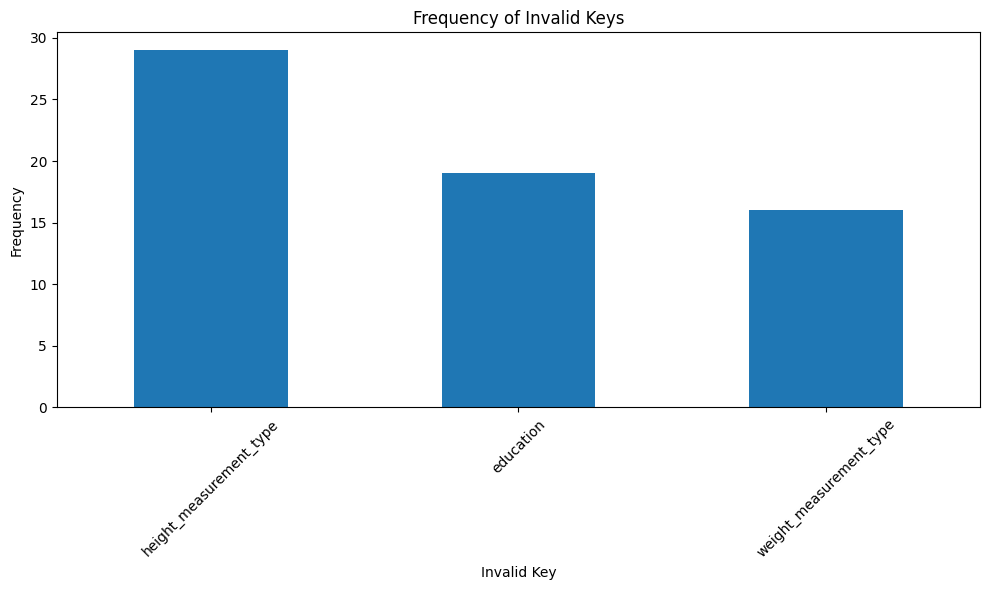

In [33]:
# graphing summary of error keys
validator.plot_invalid_keys()